In [107]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

mat = scipy.io.loadmat('ex5data1.mat')
X = mat['X'].flatten()
y = mat['y'].flatten()
Xtest = mat['Xtest'].flatten()
ytest = mat['ytest'].flatten()
Xval = mat['Xval'].flatten()
yval = mat['yval'].flatten()

In [137]:
def X_arr(X_val,poly):
    X_a = X_val**0
    for i in range(1,poly+1):
        X_a = np.c_[X_a,X_val**i]
    return X_a.T #shape polynomial+bias x banyak data

# Cost function equation

In [547]:
def J(theta_val,X_val,y_val,lambd=0):
    m = X_val.shape[0]
    poly = theta_val.flatten().shape[0] - 1
    X_a = X_arr(X_val,poly)
    z = (theta_val.reshape(1,-1) @ X_a).flatten()
    J1 = np.sum((z-y_val)**2)/(2*m)
    if lambd !=0:
        J2 = np.sum((theta_val.flatten()[1:])**2)*(lambd*0.5/m)
        return J1+J2
        print(J2)
    else:
        return J1
test = J(np.array([1,1]),X,y,1)
print(f'The value of cost function with theta of {[1,1]} is {test:.4f}, expected value of 303.993')

The value of cost function with theta of [1, 1] is 303.9932, expected value of 303.993


# Gradient cost function equation

In [241]:
def gradJ(theta_val,X_val,y_val,lambd=0):
    m = X_val.shape[0]
    poly = theta_val.flatten().shape[0] - 1
    X_a = X_arr(X_val,poly)
    z = (theta_val.reshape(1,-1) @ X_a).flatten()
    dJ = np.sum((z-y_val)*X_a,axis=1)/m
    if lambd !=0:
        dJ[1:] += theta_val.flatten()[1:]*lambd/m
    return dJ
test = gradJ(np.array([1,1]),X,y,1)
print(f'The value of gradient is [{test[0]:.4f}, {test[1]:.4f}] expected value of [-15.30, 598.250]')

The value of gradient is [-15.3030, 598.2507] expected value of [-15.30, 598.250]


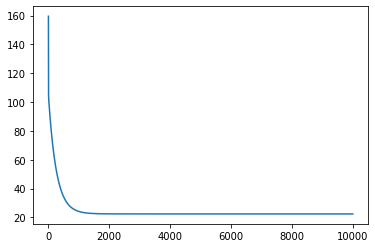

In [247]:
theta_init = np.random.rand(2)
rate = 2e-3
cost_list = []
for i in range(1,10000):
    descent_cost = gradJ(theta_init,X,y,0)
    theta_init -= rate * descent_cost
    cost_list.append(J(theta_init,X,y,0))
plt.plot(cost_list)

# Plot function

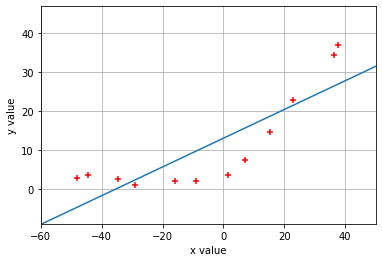

In [516]:
def plotscatter(theta_val,x_val,y_val,mk='+',ck='r',mu=1,sigma=0):
    x_list = np.linspace(-60,50,100)
    if sigma:
        x_list = np.linspace(-2,2,100)
    X_a = X_arr(x_list,theta_val.flatten().shape[0]-1)
    z = (theta_val.reshape(1,-1) @ X_a).flatten()
    plt.plot((x_list*mu)+sigma,z)
    plt.scatter(x_val,y_val,marker=mk,c=ck)
    plt.xlabel('x value')
    plt.ylabel('y value')
    plt.grid()
    plt.xlim([-60,50])
    plt.ylim([np.min(y_val)-10, np.max(y_val)+10])
plotscatter(theta_init,X,y)

## Training function

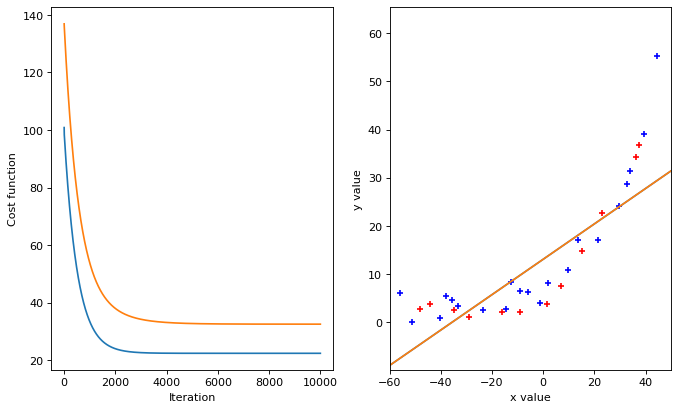

In [517]:
def train(poly,X_val,y_val,XCV=False,YCV=False,rate=1e-3,limit=10000,lamb=0,plot_cost=False):
    theta_init = np.random.rand(poly+1)
    cost_list = []
    cost_list_cv = []
    for _ in range(limit):
        descent_cost = gradJ(theta_init,X_val,y_val,lamb)
        theta_init -= rate * descent_cost
        cost_list.append(J(theta_init,X_val,y_val,lamb))
        if XCV.any() and YCV.any():
            cost_list_cv.append(J(theta_init,XCV,YCV,0))
    if plot_cost:
        plt.figure(figsize=(10, 6), dpi=80)
        plt.subplot(1,2,1)
        plt.plot(cost_list)
        if XCV.any() and YCV.any():
            plt.plot(cost_list_cv)
        plt.xlabel('Iteration')
        plt.ylabel('Cost function')
        plt.subplot(1,2,2)
        plotscatter(theta_init,X_val,y_val)
        if XCV.any() and YCV.any():
            plotscatter(theta_init,XCV,YCV,ck='b')
    return cost_list,cost_list_cv, theta_init
cst,cst2,theta_0 = train(1,X,y,Xtest,ytest,plot_cost=True)

Learning curve using Gradient descent

(0.0, 12.0)

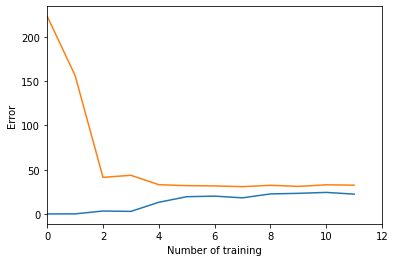

In [518]:
errorlist_train =[]
errorlist_cv =[]
for i in range(12):
    poly = 1
    cst,cst2,theta_0 = train(poly,X[:i+1],y[:i+1],Xtest,ytest,rate=1e-3,limit=10000 ,lamb=0,plot_cost=False)
    errorlist_train.append(cst[-1])
    errorlist_cv.append(cst2[-1])
plt.plot(errorlist_train)
plt.plot(errorlist_cv)
plt.xlabel('Number of training')
plt.ylabel('Error')
plt.xlim([0,12])

# Learning curve using scipy.optimize
more faster and more accurate due to the error is convergence

Underfitting due to high bias, increasing training dataset not reduce the error


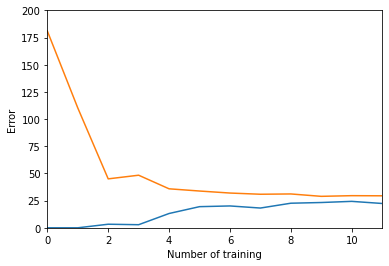

In [519]:
from scipy.optimize import minimize
errorlist_train =[]
errorlist_cv =[]
poly = 1
for i in range(12):
    op = minimize(J,np.random.rand(poly+1),args=(X[:i+1],y[:i+1],0),method='CG',jac=gradJ)
    errorlist_train.append(op.fun)
    errorlist_cv.append(J(op.x,Xval,yval,0))
plt.plot(errorlist_train)
plt.plot(errorlist_cv)
plt.xlabel('Number of training')
plt.ylabel('Error')
plt.xlim([0,11])
plt.ylim([0,200])
print('Underfitting due to high bias, increasing training dataset not reduce the error')

# Polynomial order 3

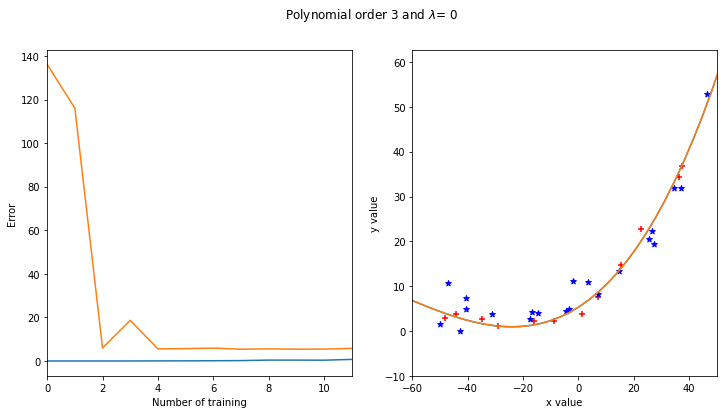

In [570]:
sigma = np.average(X)
mu = np.max(X)-np.min(X)
X0 = X/mu
def plotres(poly_val,lambda_val):
    errorlist_train =[]
    errorlist_cv =[]
    X0 = (X-sigma)/mu
    for i in range(12):
        op = minimize(J,np.random.rand(poly_val+1),args=(X0[:i+1],y[:i+1],lambda_val),method='CG',jac=gradJ)
        errorlist_train.append(op.fun)
        errorlist_cv.append(J(op.x,(Xval-sigma)/mu,yval,lambd=0))
    plt.figure(figsize=(12,6))
    plt.suptitle(f'Polynomial order {poly_val} and 'r'$\lambda$'+f'= {lambda_val}')
    plt.subplot(1,2,1)
    plt.plot(errorlist_train)
    plt.plot(errorlist_cv)
    plt.xlabel('Number of training')
    plt.ylabel('Error')
    plt.xlim([0,11])
    plt.subplot(1,2,2)
    plotscatter(op.x,X,y,mu=mu,sigma=sigma)
    plotscatter(op.x,Xval,yval,mu=mu,sigma=sigma,mk='*',ck='b')
plotres(3,0)

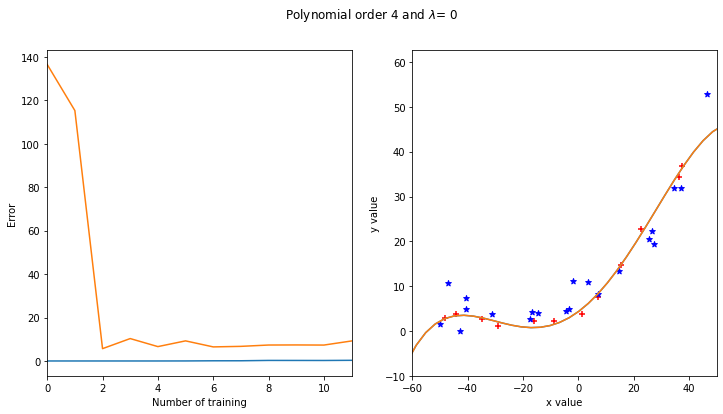

In [559]:
plotres(4,0)

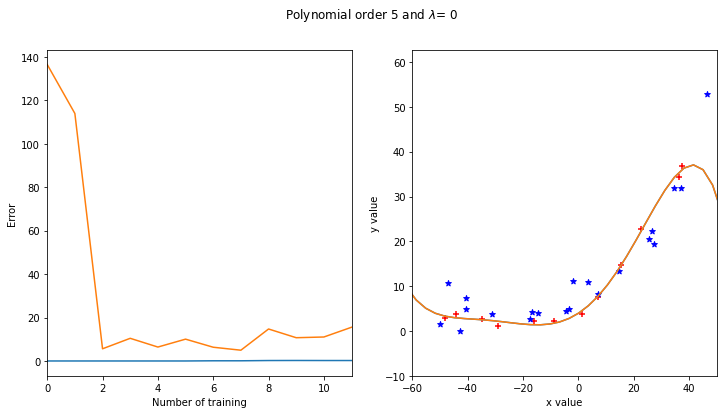

In [560]:
plotres(5,0)

Increasing polynomial not reduce the crosstest error value, thus using higher polynomial order increase overfitting

# Increase regurization parameter

Using lambda > 0.1 on polynomial order 3, training error > cross validation error


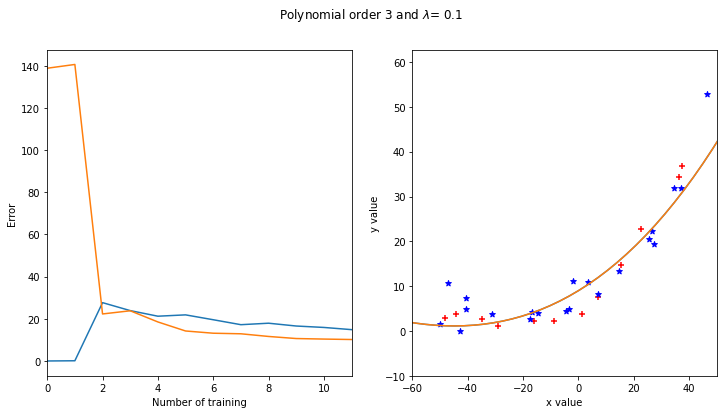

In [561]:
plotres(3,0.1)
print('Using lambda > 0.1 on polynomial order 3, training error > cross validation error')

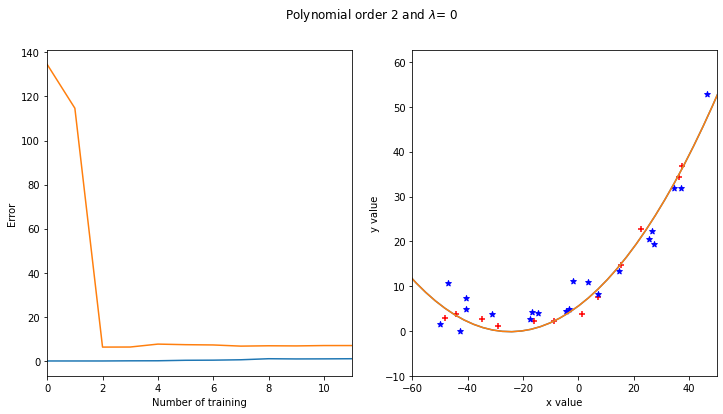

In [564]:
plotres(2,0)

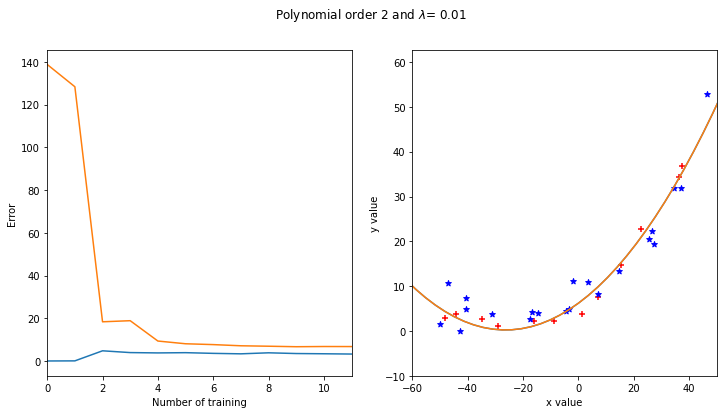

In [566]:
plotres(2,0.01)